# Modelo de Red Neuronal Artificial

Este proyecto fue creado a partir del video publicado en canal de Youtube Ringa Tech.
Enlace: https://youtu.be/iX_on3VxZzk

Usando el código explicado por el autor se desarrolló el siguiente proyecto.

### Modelo de Red Neuronal Artificial 

#### Objetivo: predecir la Presión Sistólica Sanguínea en base a la edad del paciente.

Con el mismo Dataset utilizado en el proyecto de Regresión Lineal Simple, se propone realizar un modelo que permita predecir la PSS del paciente en base a su edad. Para ello se utilizará en vez de una Regresión Lineal Simple, un modelo de Redes Neuronales Artificiales.


### Instalar la librería Tensor Flow

In [2]:
!pip install tensorflow

  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


### Importar los módulos necesarios

In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
# Carga del dataset

df = pd.read_csv('presion_sanguinea_sistolica.csv')
df.set_index('Nro')

,Edad,PSS
Nro,,
1,44,142
2,46,142
3,42,138
4,57,168
5,21,120
...,...,...
65,47,156
66,68,172
67,56,165


In [31]:
# Establecer variable independiente y variable objetivo o dependiente

x = df['Edad']
target = df['PSS']

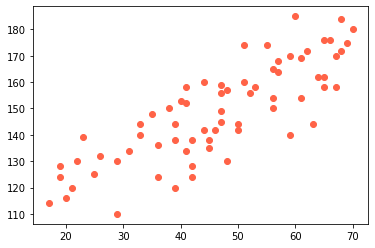

In [32]:
# Gráfico de dispersión de los datos

plt.scatter(x,target, color='tomato')
plt.show()

In [33]:
# Separamos los datos siendo un 80% destinados a entrenamiento
# Y un 20% a pruebas

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2)

X_train = X_train.to_numpy().reshape((-1,1))
X_test = X_test.to_numpy().reshape((-1,1))
y_train = y_train.to_numpy().reshape((-1,1))
y_test = y_test.to_numpy().reshape((-1,1))

In [34]:
# Establecemos las capas del modelo y el número de nueronas de entrada

capa = tf.keras.layers.Dense(units=1, input_shape=[1])

# Definimos el modelo con keras y de tipo Secuencial

modelo = tf.keras.Sequential([capa])

In [35]:
# Compilación del modelo con Adam, tasa de aprendizaje en 0,2
# Función de pérdida, error cuadrático medio

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.2),
    loss='mean_squared_error'
 )

In [36]:
# Entrenamiento del modelo

print("Comenzando entrenamiento ...")
historial = modelo.fit(X_train, y_train, epochs=500, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento ...
Modelo entrenado!


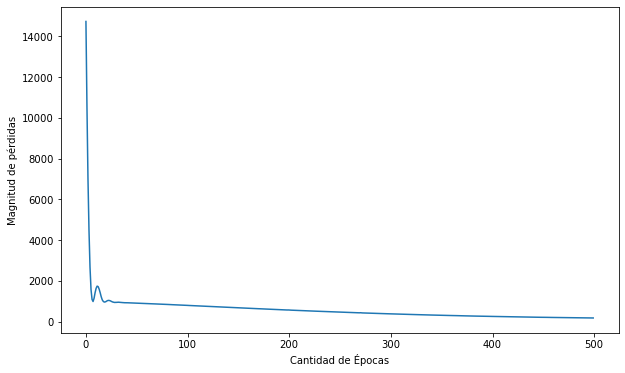

In [37]:
# Gráfico de la cantidad de error frente a las Épocas de entrenamiento del modelo

plt.figure(figsize=(10, 6))
plt.xlabel("Cantidad de Épocas")
plt.ylabel("Magnitud de pérdidas")
plt.plot(historial.history["loss"])
plt.show()

In [38]:
# Con el modelo entrenado usamos los datos prueba para realizar una predicción

print("Aplicando predicción")
y_pred = modelo.predict(X_test)

Aplicando predicción
1/1 [==============================] - 0s 40ms/step


In [39]:
# Usamos la predicción para comparar con datos de prueba

print('Dato en la posición 0')
print(X_test[0])
print(y_test[0])
print(y_pred[0])

print('Dato en la posición 3')
print(X_test[3])
print(y_test[3])
print(y_pred[3])

print('Dato en la posición 10')
print(X_test[10])
print(y_test[10])
print(y_pred[10])

Dato en la posición 0
[50]
[142]
[152.49226]
Dato en la posición 3
[29]
[130]
[118.85365]
Dato en la posición 10
[63]
[144]
[173.31616]


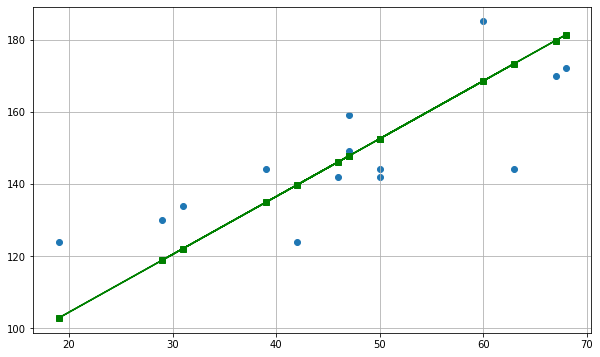

In [40]:
# Comparación entre los valores de prueba y los datos de la predición

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_pred, linestyle='-', marker='s', color='green')
plt.scatter(X_test,y_test)
plt.grid(True)
plt.show()

2/2 [==============================] - 0s 3ms/step


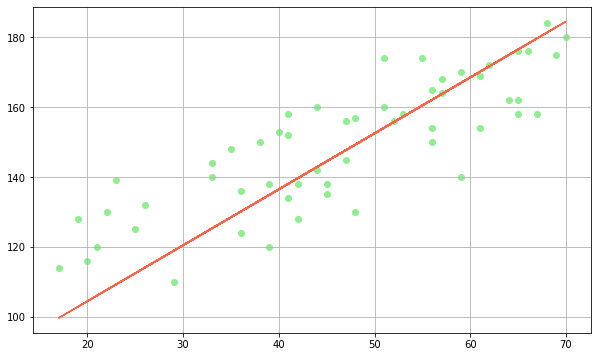

In [41]:
# Comparación entre los datos de entrenamiento y la regresión lineal generada por la red neuronal

y_pred = modelo.predict(X_train)

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_pred, linestyle='-', marker='', color='tomato')
plt.scatter(X_train, y_train, color='lightgreen')
plt.grid(True)
plt.show()